# KMT2D

In [1]:
import genophenocorr
import hpotk
from IPython.display import HTML, display
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.view import CohortViewable, ProteinVisualizer
store = hpotk.configure_ontology_store()
import pandas as pd
pd.set_option('display.max_rows', None)
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [2]:
KTM2D_transcript_id = 'NM_003482.4'
KTM2D_protein_id = "NP_003473.3"

In [3]:
fpath_phenopackets = 'input'
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)

Patients Created: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 189.81it/s]
Validated under none policy
No errors or warnings were found


In [4]:
cohort_viewable = CohortViewable(hpo=hpo)
html = cohort_viewable.process(cohort=cohort, transcript_id=KTM2D_transcript_id)
display(HTML(html))

HPO Term,ID,Annotation Count
Depressed nasal tip,HP:0000437,36
Global developmental delay,HP:0001263,30
Prominent fingertip pads,HP:0001212,30
Long palpebral fissure,HP:0000637,25
Macrotia,HP:0000400,24
Highly arched eyebrow,HP:0002553,22
Intellectual disability,HP:0001249,21
Eversion of lateral third of lower eyelids,HP:0007655,18
Cleft palate,HP:0000175,17
Hearing impairment,HP:0000365,16


In [5]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(KTM2D_transcript_id)
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(KTM2D_protein_id)


In [6]:
from genophenocorr.view import ProteinVisualizable
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

<Axes: title={'center': 'Histone-lysine N-methyltransferase 2D\ntranscript: NM_003482.4, protein: NP_003473.3'}>

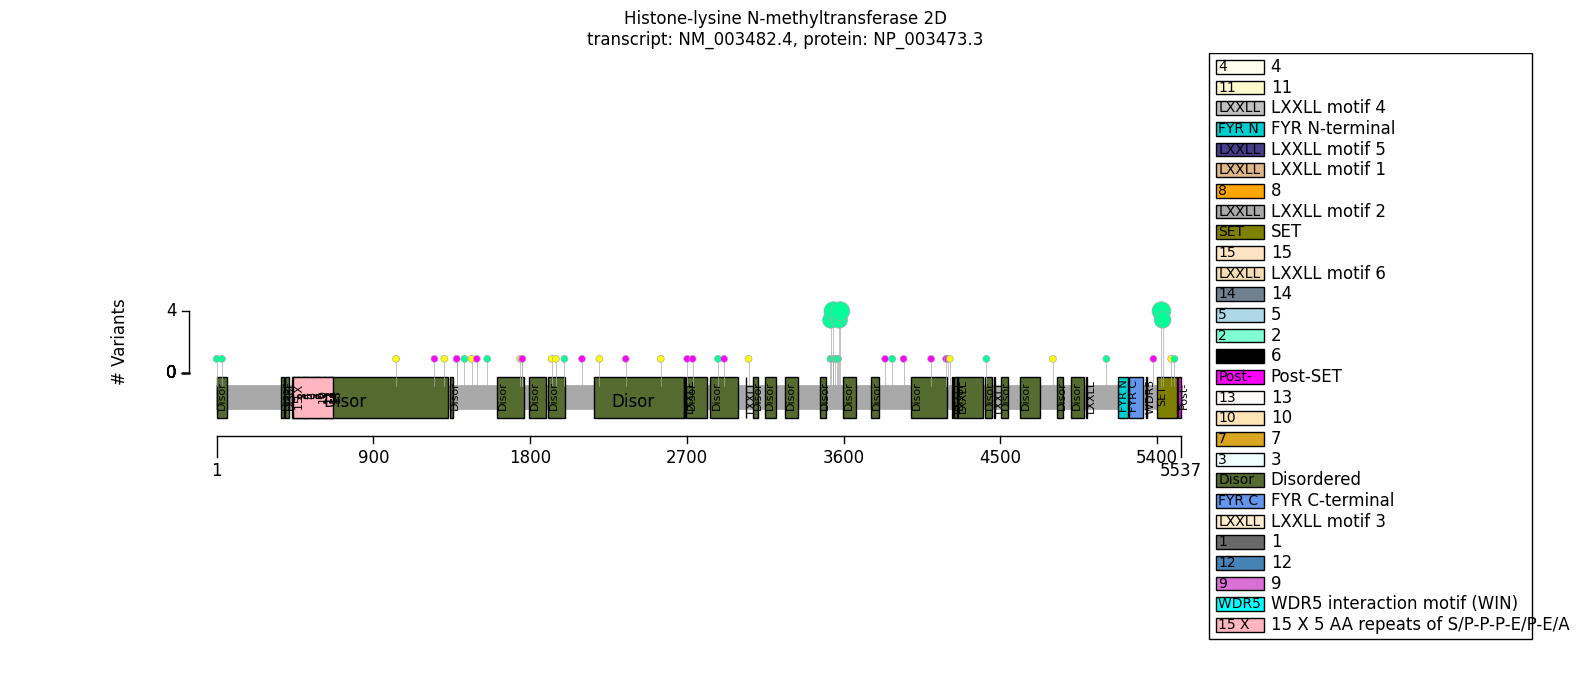

In [7]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [8]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.model import VariantEffect

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [9]:
missense_var = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=KTM2D_transcript_id)
print(len(missense_var.pvals))
missense_var.summarize(hpo, PatientCategories.YES)

450


MISSENSE_VARIANT on NM_003482.4                       Yes             No  \
                                                    Count Percent  Count   
Sensorineural hearing impairment [HP:0000407]        6/11     55%   0/13   
Hearing impairment [HP:0000365]                     14/19     74%   8/21   
Ventricular septal defect [HP:0001629]               0/15      0%   5/21   
High forehead [HP:0000348]                            5/6     83%    1/5   
Motor delay [HP:0001270]                              2/8     25%    2/2   
Hypotonia [HP:0001252]                                2/7     29%  10/14   
Hypoglycemia [HP:0001943]                             1/1    100%    0/5   
Patent ductus arteriosus [HP:0001643]                1/24      4%   4/21   
Decreased proportion of CD4-positive, alpha-bet...    6/8     75%    2/5   
Depressed nasal ridge [HP:0000457]                    1/5     20%    1/1   
Blue sclerae [HP:0000592]                             4/7     57%   3/10   
Highly arched eyebrow [HP:0002553]                    8/9     89%  14/21   
Atrial septal defect [HP:0001631]                     5/7     71%   6/13   
Eversion of lateral third of lower eyelids [HP:...    2/3     67%  16/18   
Sacral dimple [HP:0000960]                            0/2      0%   6/10   
Recurrent otitis media [HP:0000403]                  8/15     53%   6/17   
Decreased proportion of memory B cells [HP:0030...    6/8     75%    5/5   
Renal duplication [HP:0000075]                        0/5      0%    2/8   
Ptosis [HP:0000508]                                   0/7      0%   2/11   
Intellectual disability, mild [HP:0001256]           3/12     25%    1/2   
Long palpebral fissure [HP:0000637]                   8/8    100%  17/21   
Sparse lateral eyebrow [HP:0005338]                   6/7     86%    5/8   
Seizure [HP:0001250]                                  2/8     25%   2/17   
Congenital hip dislocation [HP:0001374]               1/7     14%   5/16   
Coarctation of aorta [HP:0001680]                    1/15      7%   3/21   
Clinodactyly of the 5th finger [HP:0004209]           2/9     22%   4/11   
Patent foramen ovale [HP:0001655]                    2/24      8%   3/20   
Proportionate short stature [HP:0003508]             7/11     64%    4/9   
Severe short stature [HP:0003510]                    7/12     58%   4/10   
Scoliosis [HP:0002650]                               6/19     32%   4/17   
Depressed nasal tip [HP:0000437]                    16/20     80%  20/27   
Abnormality of the endocrine system [HP:0000818]      7/7    100%    1/1   
Abnormal middle ear morphology [HP:0008609]           0/0      0%    1/1   
Growth abnormality [HP:0001507]                     13/13    100%  16/16   
Abnormality of the upper limb [HP:0002817]          15/15    100%  20/20   
Orofacial cleft [HP:0000202]                          9/9    100%    8/8   
Abnormal ocular adnexa morphology [HP:0030669]      13/13    100%  21/21   
Abnormal renal morphology [HP:0012210]                1/1    100%    4/4   
Abnormality of the hand [HP:0001155]                15/15    100%  20/20   
Abnormal soft palate morphology [HP:0100736]          2/2    100%    0/0   
Abnormality of metabolism/homeostasis [HP:0001939]    5/5    100%    3/3   
Abnormal skeletal morphology [HP:0011842]           23/23    100%  26/26   
Abnormality of the gastrointestinal tract [HP:0...    5/5    100%    0/0   
Abnormality of the scalp hair [HP:0100037]            0/0      0%    2/2   
Abnormality of the abdominal organs [HP:0002012]      0/0      0%    1/1   
Neoplasm by anatomical site [HP:0011793]              0/0      0%    1/1   
Cupped ear [HP:0000378]                               1/3     33%    0/0   
Abnormality of the genitourinary system [HP:000...    4/4    100%    6/6   
Choanal atresia [HP:0000453]                          8/8    100%    0/0   
Strabismus [HP:0000486]                               2/8     25%   4/16   
Abnormal hair pattern [HP:0010720]              

In [10]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [11]:
missense_var = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=KTM2D_transcript_id)
missense_var.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_003482.4                       Yes             No  \
                                                    Count Percent  Count   
Sensorineural hearing impairment [HP:0000407]        6/11     55%   0/13   
Hearing impairment [HP:0000365]                     14/19     74%   8/21   
Ventricular septal defect [HP:0001629]               0/15      0%   5/21   
High forehead [HP:0000348]                            5/6     83%    1/5   
Motor delay [HP:0001270]                              2/8     25%    2/2   
Hypotonia [HP:0001252]                                2/7     29%  10/14   
Patent ductus arteriosus [HP:0001643]                1/24      4%   4/21   
Decreased proportion of CD4-positive, alpha-bet...    6/8     75%    2/5   
Blue sclerae [HP:0000592]                             4/7     57%   3/10   
Highly arched eyebrow [HP:0002553]                    8/9     89%  14/21   
Atrial septal defect [HP:0001631]                     5/7     71%   6/13   
Eversion of lateral third of lower eyelids [HP:...    2/3     67%  16/18   
Sacral dimple [HP:0000960]                            0/2      0%   6/10   
Recurrent otitis media [HP:0000403]                  8/15     53%   6/17   
Decreased proportion of memory B cells [HP:0030...    6/8     75%    5/5   
Renal duplication [HP:0000075]                        0/5      0%    2/8   
Ptosis [HP:0000508]                                   0/7      0%   2/11   
Intellectual disability, mild [HP:0001256]           3/12     25%    1/2   
Long palpebral fissure [HP:0000637]                   8/8    100%  17/21   
Sparse lateral eyebrow [HP:0005338]                   6/7     86%    5/8   
Seizure [HP:0001250]                                  2/8     25%   2/17   
Congenital hip dislocation [HP:0001374]               1/7     14%   5/16   
Coarctation of aorta [HP:0001680]                    1/15      7%   3/21   
Clinodactyly of the 5th finger [HP:0004209]           2/9     22%   4/11   
Patent foramen ovale [HP:0001655]                    2/24      8%   3/20   
Proportionate short stature [HP:0003508]             7/11     64%    4/9   
Severe short stature [HP:0003510]                    7/12     58%   4/10   
Scoliosis [HP:0002650]                               6/19     32%   4/17   
Depressed nasal tip [HP:0000437]                    16/20     80%  20/27   
Ectopic kidney [HP:0000086]                           0/2      0%    2/9   
Decreased circulating IgA level [HP:0002720]          2/8     25%    2/5   
Thin upper lip vermilion [HP:0000219]                 3/4     75%    4/6   
Delayed speech and language development [HP:000...   8/10     80%    2/2   
Low posterior hairline [HP:0002162]                   0/1      0%    2/6   
Feeding difficulties [HP:0011968]                    5/14     36%   3/11   
Long eyelashes [HP:0000527]                           0/1      0%    3/6   
Micrognathia [HP:0000347]                             3/6     50%    4/9   
Microcephaly [HP:0000252]                             3/7     43%   4/11   
Cleft palate [HP:0000175]                            9/10     90%    8/8   
High, narrow palate [HP:0002705]                      8/9     89%    6/6   
Prominent fingertip pads [HP:0001212]               12/15     80%  18/23   
Wide nasal bridge [HP:0000431]                        3/3    100%  11/14   
Postnatal growth retardation [HP:0008897]             5/8     62%    4/5   
Joint hypermobility [HP:0001382]                      2/7     29%   3/12   
Sparse eyebrow [HP:0045075]                           6/7     86%   8/11   
Recurrent infections [HP:0002719]                   15/21     71%  15/20   
High palate [HP:0000218]                            10/11     91%    8/8   
Short stature [HP:0004322]                           9/13     69%  13/18   

MISSENSE_VARIANT on NM_003482.4                                       \
                                                   Percent   p value   
Sensorineural hearing impairment [HP:0000407]          

In [12]:
mtc_report = missense_var.mtc_filter_report
sview = StatsViewable(hpo_mtc_report=mtc_report)
display(HTML(sview.process(cohort=missense_var)))


NameError: name 'StatsViewable' is not defined